<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/Gavrilkov-Nikolay-folder/Gavrilkov%20Nikolay/internship_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1-я стажировка "Профпатолог"

In [64]:
# Импорт библиотек
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Дополнительные инструменты
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

import random 
import math 
import os 
import re 
%matplotlib inline

## Загрузка и предварительная обработка

In [ ]:
df_stock = pd.read_excel('/content/drive/MyDrive/profpatolog/датасет профпатолог часть.xlsx')
df_stock.head()

Exception ignored in: <function _xla_gc_callback at 0x7f95c07929e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
df_stock.isna().sum().sum()

In [ ]:
df_stock.isna().sum().sum() *100 / df_stock.size

In [ ]:
df_stock.shape

In [ ]:
df_cor = df_stock.copy()

In [ ]:
# Анализ целевого столбца "ЗаключениеМК"
print(f"заполненных строк - {df_cor['ЗаключениеМК'].count()}, не заполнено - {df_cor['ЗаключениеМК'].isna().sum()}")
print(f"Количество уникальных записей - {df_cor['ЗаключениеМК'].nunique()}")
df_cor['ЗаключениеМК'].unique()

In [ ]:
#Удалим строки с ошибками заполнения
count_ind = df_cor.shape[0]
for str1 in ('машинист бульдозера', 'Газоспасатель',' Газоспасатель'):
    df_cor = df_cor.drop(df_cor[df_cor['ЗаключениеМК'] == str1].index)
print(f'Удалено {count_ind - df_cor.shape[0]} строк(и)')
df_cor.shape

In [ ]:
# Строки с незаполненным столбцом выделим в отдельный датафрейм
df_NAN = df_cor[df_cor['ЗаключениеМК'].isna()]
df_NAN.shape

In [ ]:
 # Удалим строки из основного набора
df_cor = df_cor.drop(df_cor[df_cor['ЗаключениеМК'].isna()].index)
df_cor.shape

In [ ]:
#Удалим колонки не имеющие записей
print(f'Размер до - {df_cor.shape}')
df_cor = df_cor.dropna(axis=1, how='all')
print(f'Размер после - {df_cor.shape}')

In [ ]:
# процет незаполненных ячеек
df_cor.isna().sum().sum() * 100 / df_cor.size

In [ ]:
df_cor['ЗаключениеМК'].value_counts()

In [ ]:
# Приведение к 3 классам
new_val = {'ГоденСКоррекциейЗрения':'ОграниченноГоден','ГоденБезРаботНаВысотах':'ОграниченноГоден','НуждаетсяВДообследованииИЛечении':'НеГоден','ВременноНегоден':'НеГоден','Годен':'Годен','ОграниченноГоден':'ОграниченноГоден'}
df_cor['ЗаключениеМК'] = df_cor['ЗаключениеМК'].map(new_val)

In [ ]:
df_cor['ЗаключениеМК'].value_counts()

In [ ]:
# Анализ данных
counts = df_cor.count(axis=0)
unikues = df_cor.nunique(axis=0)
types = df_cor.dtypes
df_x = pd.concat([counts.to_frame(name='count'), unikues.to_frame(name='unikue'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

In [ ]:
# Составим список удаляемых колонок
del_col = ['ДокументПрохождениеМедосмотра','Клиент','КлиентПолПредставление','ЗаключениеМКПредставление','Заключение','ДиспансернаяГруппаПредставление',
           'ДатаЗавершенияМедосмотра','ТипМедосмотраПредставление','Контрагент','Цех']

In [ ]:
# Добавим некоторые колонки по условию
col_list = list(df_cor.columns)
for elem in col_list:
    if 'ДокументПрием' in elem or 'ДатаПриема' in elem:
        del_col.append(elem)
        continue
    if 'Салон' in elem or 'ЛабораторныеИсследования' in elem:    
        del_col.append(elem)
        continue
    if 'Врач' in elem or 'Специализация' in elem:
        del_col.append(elem)
        continue
    if 'Серд' in elem or 'Рост' in elem or 'Вес' in elem:
        del_col.append(elem)
        continue

print(len(del_col))
print(del_col)

In [ ]:
df_cor = df_cor.drop(del_col, axis=1)

In [ ]:
df_cor.shape

In [ ]:
# Проверка результата
counts = df_cor.count(axis=0)
unikues = df_cor.nunique(axis=0)
types = df_cor.dtypes
df_x = pd.concat([counts.to_frame(name='count'), unikues.to_frame(name='unikue'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x[df_x['unikue']==1]

In [ ]:
df_cor['Офтальмология1_Детализация1'].unique()

In [ ]:
# Выведем наименее заполненные колонки и колонки заполненные одним значением
rez_col = list(df_x[((df_x['count'] <= 30) & (df_x['unikue'] < 10)) | (df_x['unikue'] == 1)].index)
print(len(rez_col))
print(rez_col)

In [ ]:
# отделим колонки в отдельный датафрейм
df_rez = df_cor[rez_col]
df_rez.shape

In [ ]:
# очистим датасет
df_cor = df_cor.drop(rez_col, axis=1)
df_cor.shape

In [ ]:
# Сохранение текущих датафреймов
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor.csv', index=False)
df_NAN.to_csv('/content/drive/MyDrive/profpatolog/df_NAN.csv', index=False)
df_rez.to_csv('/content/drive/MyDrive/profpatolog/df_rez.csv', index=False)

## 2-й этап

In [ ]:
# Загрузка сохраненных ранее датафреймов
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor.csv')

<ipython-input-2-38e2b18a2eb2>:2: DtypeWarning: Columns (91,92,101,102,140,141,251,252,255,256,259,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor.csv')


In [ ]:
df_cor.shape

(1571, 631)

In [ ]:
col_list = df_cor.columns.tolist()
col_ter = []
col_psn = []
col_gin = []
col_oft = []
col_lor = []
col_sto = []
col_hir = []
col_nvr = []
col_drv = []
col_uzi = []
col_end = []
col_prm = []
col_all = []
for elem in col_list:
    if 'Терапия' in elem:
        col_ter.append(elem)
        col_all.append(elem)
    if 'Психиатрия' in elem:
        col_psn.append(elem)
        col_all.append(elem)
    if 'Гинеколог' in elem:
        col_gin.append(elem)
        col_all.append(elem)
    if 'Офтальм' in elem:
        col_oft.append(elem)
        col_all.append(elem)
    if 'Оторинол' in elem:
        col_lor.append(elem)
        col_all.append(elem)
    if 'Стоматол' in elem:
        col_sto.append(elem)
        col_all.append(elem)
    if 'Хирург' in elem:
        col_hir.append(elem)
        col_all.append(elem)
    if 'Неврол' in elem:
        col_nvr.append(elem)
        col_all.append(elem)
    if 'Дермато' in elem:
        col_drv.append(elem)
        col_all.append(elem)
    if 'УЗИД' in elem:
        col_uzi.append(elem)
        col_all.append(elem)
    if 'Процедур' in elem:
        col_prm.append(elem)
        col_all.append(elem)
    if 'Эндос' in elem:
        col_end.append(elem)
        col_all.append(elem)
print(len(col_ter))
print(col_ter[:5])        
print(len(col_psn))
print(col_psn[:5])        
print(len(col_gin))
print(col_gin[:5])        
print(len(col_oft))
print(col_oft[:5])        
print(len(col_lor))
print(col_lor[:5])        
print(len(col_sto))
print(col_sto[:5])        
print(len(col_hir))
print(col_hir[:5])        
print(len(col_nvr))
print(col_nvr[:5])        
print(len(col_drv))
print(col_drv[:5])        
print(len(col_uzi))
print(col_uzi[:5])        
print(len(col_prm))
print(col_prm[:5])        
print(len(col_end))
print(col_end[:5])        

print(len(col_all))

col_ost = []
for elem in col_list:
    if elem not in col_all:
        col_ost.append(elem)

print(len(col_ost))

93
['Терапия1_ХР_Рекомендация1', 'Терапия1_ХР_Рекомендация1Представление', 'Терапия1_ХР_Рекомендация2', 'Терапия1_ХР_Рекомендация2Представление', 'Терапия1_АртериальноеДавление_Значение']
62
['ПсихиатрияНаркология1_ХР_РекомендацияСтр', 'ПсихиатрияНаркология1_МКБ101', 'ПсихиатрияНаркология1_ДиагнозПредставление1', 'ПсихиатрияНаркология1_ПрофнепригодностьВременная1', 'ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1']
78
['Гинекология1_ХР_Рекомендация1', 'Гинекология1_ХР_Рекомендация1Представление', 'Гинекология1_МКБ101', 'Гинекология1_ДиагнозПредставление1', 'Гинекология1_ПрофнепригодностьВременная1']
102
['Офтальмология1_ХР_Рекомендация1', 'Офтальмология1_ХР_Рекомендация1Представление', 'Офтальмология1_МКБ101', 'Офтальмология1_ДиагнозПредставление1', 'Офтальмология1_Детализация1']
41
['Оториноларингология1_МКБ101', 'Оториноларингология1_ДиагнозПредставление1', 'Оториноларингология1_Детализация1', 'Оториноларингология1_ПрофнепригодностьВременная1', 'Оториноларингология1_Пр

In [ ]:
# небольшая ф-ция по слиянию колонок
def col_concat (row, list_row):
    for row1 in list_row:
        print(f'{row} было заполнено - {df_cor[row].count()}')
        df_cor.loc[df_cor[row].isna(),[row]] = df_cor[row1]
        print(f'{row} стало - {df_cor[row].count()}')
    return

## Раздел Терапии

In [ ]:
#df_cor['Терапия1_П_Значение'] = df_cor['Терапия1_П_Значение'].fillna(0)
print(df_cor['Терапия1_П_Значение'].count())
df_cor['Терапия1_П_Значение'].unique()

1380


array([ 76.,  65.,  66.,  80.,  70.,  77.,  74.,  75.,  nan,  69.,  82.,
       100.,  64.,  67.,  78.,  79.,  57.,  72.,  60.,  58.,  68.,  73.,
        59.,  63.,  85.,  86.,  89.,  83.,  84.,  48.,  50.,  87.,  53.,
        96.,  97.,  81.,  54.,  88.,  92.,  61.,  52.,  98.,  93., 101.,
        94.,   8.,  91., 104., 102.,  90.,  71.,  62., 127., 103., 122.,
       118.,  56., 108.,  95., 110.,  55., 109.,  51., 134.,  99., 107.,
         2.])

In [ ]:
# Приведем в порядок колонку 'Терапия1_АртериальноеДавление_Значение'
map_x = lambda x: x if len(str(x)) <= 3 else str(x)[:3]
df_cor['Терапия1_АртериальноеДавление_Значение'] = df_cor['Терапия1_АртериальноеДавление_Значение'].map(map_x)
df_cor['Терапия2_АртериальноеДавление_Значение'] = df_cor['Терапия2_АртериальноеДавление_Значение'].map(map_x)
# И переведем её в float формат
df_cor = df_cor.astype({'Терапия1_АртериальноеДавление_Значение': np.float64})
df_cor = df_cor.astype({'Терапия2_АртериальноеДавление_Значение': np.float64})
#df_cor['Терапия1_АртериальноеДавление_Значение'] = df_cor['Терапия1_АртериальноеДавление_Значение'].fillna(0)
print(df_cor['Терапия1_АртериальноеДавление_Значение'].count())
df_cor['Терапия1_АртериальноеДавление_Значение'].unique()

1389


array([140., 150., 120., 110., 105., 130., 125., 133., 100., 160.,  nan,
       180., 115.,  90., 135., 128., 138., 112., 129., 118., 155., 102.,
       144., 107., 141., 182., 145., 131., 123., 193., 121., 127., 113.,
       132., 109., 117., 137., 124., 116., 171., 151., 142., 134., 146.,
       168., 119., 111., 177., 165., 122., 153., 159., 143., 147., 148.,
       167., 136., 139., 189., 166., 162., 158., 172., 169., 152., 126.,
       198., 161., 174., 175., 186., 108., 106., 170., 154., 149., 173.,
       157., 114., 163.,  95., 101.])

In [ ]:
#df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление'] = df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление'].fillna(0)

Список полей "Терапия":

'Терапия1_П_Значение', 'Терапия1_АртериальноеДавление_Значение', 'Терапия1_АртериальноеДавление21_ЗначениеПредставление', 'Терапия1_ПрофнепригодностьВременнаяПредставление1', 'Терапия1_ДиагнозПредставление1', 'Терапия1_ИМТ_ЗначениеПредставление', 'Терапия1_ХР_Рекомендация1Представление'

In [ ]:
# Дозаполним колонки с одинаковыми данными
print(df_cor['Терапия1_ИМТ_ЗначениеПредставление'].count())
df_cor.loc[df_cor['Терапия1_ИМТ_ЗначениеПредставление'].isna(),['Терапия1_ИМТ_ЗначениеПредставление']] = df_cor['Терапия2_ИМТ_ЗначениеПредставление']
print(df_cor['Терапия1_ИМТ_ЗначениеПредставление'].count())
print(df_cor['Терапия1_ХР_Рекомендация1Представление'].count())
df_cor.loc[df_cor['Терапия1_ХР_Рекомендация1Представление'].isna(),['Терапия1_ХР_Рекомендация1Представление']] = df_cor['Терапия1_ХР_Рекомендация2Представление']
print(df_cor['Терапия1_ХР_Рекомендация1Представление'].count())

1313
1320
185
185


In [ ]:
# небольшая ф-ция по слиянию колонок
def col_concat (row, list_row):
    for row1 in list_row:
        print(f'{row} было заполнено - {df_cor[row].count()}')
        df_cor.loc[df_cor[row].isna(),[row]] = df_cor[row1]
        print(f'{row} стало - {df_cor[row].count()}')
    return


In [ ]:
col_to_cnc = ['Терапия1_АнамнезДополнение_ЗначениеПредставление','Терапия2_ДиагнозПредставление1','Терапия1_ДиагнозПредставление2','Терапия1_Детализация1',
              'Терапия2_Диагноз_ЗначениеПредставление','Терапия2_АнамнезДополнение_ЗначениеПредставление','Терапия1_Диагноз_ЗначениеПредставление']
col_concat('Терапия1_ДиагнозПредставление1', col_to_cnc)

Терапия1_ДиагнозПредставление1 было заполнено - 1358
Терапия1_ДиагнозПредставление1 стало - 1369
Терапия1_ДиагнозПредставление1 было заполнено - 1369
Терапия1_ДиагнозПредставление1 стало - 1376
Терапия1_ДиагнозПредставление1 было заполнено - 1376
Терапия1_ДиагнозПредставление1 стало - 1376
Терапия1_ДиагнозПредставление1 было заполнено - 1376
Терапия1_ДиагнозПредставление1 стало - 1376
Терапия1_ДиагнозПредставление1 было заполнено - 1376
Терапия1_ДиагнозПредставление1 стало - 1376
Терапия1_ДиагнозПредставление1 было заполнено - 1376
Терапия1_ДиагнозПредставление1 стало - 1382


In [ ]:
col_to_cnc = ['Терапия1_ГоденНегоден_ЗначениеПредставление','Терапия2_ГоденНегоден_ЗначениеПредставление',
              'Терапия1_ПрофнепригодностьВременнаяПредставление2','Терапия2_ПрофнепригодностьВременнаяПредставление2']
col_concat('Терапия1_ПрофнепригодностьВременнаяПредставление1', col_to_cnc)

Терапия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1343
Терапия1_ПрофнепригодностьВременнаяПредставление1 стало - 1394
Терапия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1394
Терапия1_ПрофнепригодностьВременнаяПредставление1 стало - 1397
Терапия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1397
Терапия1_ПрофнепригодностьВременнаяПредставление1 стало - 1397
Терапия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1397
Терапия1_ПрофнепригодностьВременнаяПредставление1 стало - 1397


In [ ]:
# Проверка результата
counts = df_cor[col_ter].count(axis=0)
uniques = df_cor[col_ter].nunique(axis=0)
types = df_cor[col_ter].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
#df_x.sort_values(by=['count'])[60:]
df_x[:30]

,count,unique,type
Терапия1_ХР_Рекомендация1,185,4,object
Терапия1_ХР_Рекомендация1Представление,185,4,object
Терапия1_ХР_Рекомендация2,150,3,object
Терапия1_ХР_Рекомендация2Представление,150,3,object
Терапия1_АртериальноеДавление_Значение,1389,81,float64
Терапия1_АртериальноеДавление_ЗначениеПредставление,1389,142,object
Терапия1_П_Значение,1380,66,float64
Терапия1_П_ЗначениеПредставление,1380,66,float64
Терапия1_АнамнезДополнение_Значение,265,215,object
Терапия1_АнамнезДополнение_ЗначениеПредставление,265,215,object


In [ ]:
print(df_cor['Терапия2_АртериальноеДавление_Значение'].count())
df_cor['Терапия2_АртериальноеДавление_Значение'].value_counts()

In [ ]:
col_to_cnc = ['Терапия1_ЧССТерапевт_Значение','Терапия2_П_Значение']
col_concat('Терапия1_П_Значение',col_to_cnc)

Терапия1_П_Значение было заполнено - 1380
Терапия1_П_Значение стало - 1380
Терапия1_П_Значение было заполнено - 1380
Терапия1_П_Значение стало - 1386


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_ter.csv')

## Раздел психиатрии

In [ ]:
# очистим датасет
#df_cor = df_cor.drop(col_to_del, axis=1)
df_cor.shape

(1571, 631)

In [ ]:
counts = df_cor[col_psn].count(axis=0)
uniques = df_cor[col_psn].nunique(axis=0)
types = df_cor[col_psn].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x[30:]

,count,unique,type
ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление,1175,11,object
ПсихиатрияНаркология1_БезСледовСамопорезов_Значение,1213,2,object
ПсихиатрияНаркология1_БезСледовСамопорезов_ЗначениеПредставление,1213,2,object
ПсихиатрияНаркология1_МышлениеКонкретное_Значение,1211,2,object
ПсихиатрияНаркология1_МышлениеКонкретное_ЗначениеПредставление,1211,2,object
ПсихиатрияНаркология1_ДанныхЗаНаркологическуюПатологиюНаМоментОсмотра_Значение,1211,3,object
ПсихиатрияНаркология1_ДанныхЗаНаркологическуюПатологиюНаМоментОсмотра_ЗначениеПредставление,1211,3,object
ПсихиатрияНаркология2_ХР_РекомендацияСтр,37,2,object
ПсихиатрияНаркология2_МКБ101,113,2,object
ПсихиатрияНаркология2_ДиагнозПредставление1,113,2,object


Колонки "Психиатр":

'ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1', 'ПсихиатрияНаркология1_ДиагнозПредставление1'

In [ ]:
print(df_cor['ПсихиатрияНаркология1_Эмоционально_ЗначениеПредставление'].count())
df_cor['ПсихиатрияНаркология1_Эмоционально_ЗначениеПредставление'].value_counts()

1215


стабилен                                                        1204
астеничен                                                          3
лабилен,ригиден. На коррекцию раздражителен                        2
легко аффектируется. На критику реагирует правильно.               1
излишне тревожен, лябилен, подозрителен                            1
астеничен, медлителен                                              1
ригиден                                                            1
лабилен, протестен, груб,на коррекцию реагирует раздражением       1
лабилен, протестен, на коррекцию реагирует алекватно               1
Name: ПсихиатрияНаркология1_Эмоционально_ЗначениеПредставление, dtype: int64

In [ ]:
col_to_cnc = ['ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление']
col_concat('ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1',col_to_cnc)

ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1207
ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1 стало - 1217


In [ ]:
col_to_cnc = ['ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление','ПсихиатрияНаркология2_ДиагнозПредставление1',
              'ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление']
col_concat('ПсихиатрияНаркология1_ДиагнозПредставление1',col_to_cnc)

ПсихиатрияНаркология1_ДиагнозПредставление1 было заполнено - 1208
ПсихиатрияНаркология1_ДиагнозПредставление1 стало - 1213
ПсихиатрияНаркология1_ДиагнозПредставление1 было заполнено - 1213
ПсихиатрияНаркология1_ДиагнозПредставление1 стало - 1214
ПсихиатрияНаркология1_ДиагнозПредставление1 было заполнено - 1214
ПсихиатрияНаркология1_ДиагнозПредставление1 стало - 1214


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_ter_psn.csv')

## Раздел Гинекологии

In [ ]:
counts = df_cor[col_gin].count(axis=0)
uniques = df_cor[col_gin].nunique(axis=0)
types = df_cor[col_gin].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x[:40]

,count,unique,type
Гинекология1_ХР_Рекомендация1,47,4,object
Гинекология1_ХР_Рекомендация1Представление,47,4,object
Гинекология1_МКБ101,363,6,object
Гинекология1_ДиагнозПредставление1,363,6,object
Гинекология1_ПрофнепригодностьВременная1,363,2,object
Гинекология1_ПрофнепригодностьВременнаяПредставление1,363,2,object
Гинекология1_ГоденНегоден_Значение,402,2,object
Гинекология1_ГоденНегоден_ЗначениеПредставление,402,2,object
Гинекология1_Анамнез_Значение,402,2,object
Гинекология1_Анамнез_ЗначениеПредставление,402,2,object


Колонки "Гинекологи":

'Гинекология1_ДиагнозПредставление1', 'Гинекология1_ГоденНегоден_ЗначениеПредставление'

In [ ]:
print(df_cor['Гинекология1_ХР_Рекомендация1Представление'].count())
df_cor['Гинекология1_ХР_Рекомендация1Представление'].value_counts()

47


УЗИ органов малого таза на 6-10 день м.ц.    26
Диспансерное наблюдение гинеколога           10
Консультация маммолога                        8
Проведение кольпоскопии                       3
Name: Гинекология1_ХР_Рекомендация1Представление, dtype: int64

In [ ]:
col_to_cnc = ['Гинекология1_ДиагнозДополнение_ЗначениеПредставление','Гинекология1_Диагноз_ЗначениеПредставление',
              'Гинекология1_АнамнезДополнение_ЗначениеПредставление','Гинекология1_Анамнез_ЗначениеПредставление']
col_concat('Гинекология1_ДиагнозПредставление1',col_to_cnc)

Гинекология1_ДиагнозПредставление1 было заполнено - 363
Гинекология1_ДиагнозПредставление1 стало - 386
Гинекология1_ДиагнозПредставление1 было заполнено - 386
Гинекология1_ДиагнозПредставление1 стало - 399
Гинекология1_ДиагнозПредставление1 было заполнено - 399
Гинекология1_ДиагнозПредставление1 стало - 399
Гинекология1_ДиагнозПредставление1 было заполнено - 399
Гинекология1_ДиагнозПредставление1 стало - 402


In [ ]:
col_to_cnc = ['Гинекология1_ПрофнепригодностьВременнаяПредставление1']
col_concat('Гинекология1_ГоденНегоден_ЗначениеПредставление',col_to_cnc)

Гинекология1_ГоденНегоден_ЗначениеПредставление было заполнено - 402
Гинекология1_ГоденНегоден_ЗначениеПредставление стало - 402


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_ter_psn_gin.csv')

## Раздел "Офтальмология"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_ter_psn_gin.csv',index_col=0)
df_cor.shape

<ipython-input-4-75a93f0f5cd0>:2: DtypeWarning: Columns (92,93,102,103,142,252,253,256,257,261,303,315,316,344,345,354,355,356,357,358,359,370,371,424,425,508,509,526,527,528,529,612,613,624,625) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_ter_psn_gin.csv',index_col=0)


(1571, 631)

In [ ]:
counts = df_cor[col_oft].count(axis=0)
uniques = df_cor[col_oft].nunique(axis=0)
types = df_cor[col_oft].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x[:35]

,count,unique,type
Офтальмология1_ХР_Рекомендация1,342,6,object
Офтальмология1_ХР_Рекомендация1Представление,342,6,object
Офтальмология1_МКБ101,1005,18,object
Офтальмология1_ДиагнозПредставление1,1005,18,object
Офтальмология1_Детализация1,336,131,object
Офтальмология1_Классификация11,98,2,object
Офтальмология1_Классификация1Представление1,98,2,object
Офтальмология1_Классификация21,90,2,object
Офтальмология1_Классификация2Представление1,90,2,object
Офтальмология1_ПрофнепригодностьВременная1,993,3,object


Колонки "Офтальмогогия":

'Офтальмология1_ДиагнозПредставление1', 'Офтальмология1_ХР_Рекомендация1Представление', 'Офтальмология1_ПрофнепригодностьВременнаяПредставление1'

In [ ]:
print(df_cor['Офтальмология2_ПрофнепригодностьВременнаяПредставление2'].count())
df_cor['Офтальмология2_ПрофнепригодностьВременнаяПредставление2'].value_counts()

78


Годен              76
Годен, кроме п.     2
Name: Офтальмология2_ПрофнепригодностьВременнаяПредставление2, dtype: int64

In [ ]:
col_to_cnc = ['Офтальмология1_ПрофнепригодностьВременнаяПредставление2','Офтальмология2_ПрофнепригодностьВременнаяПредставление1',
              'Офтальмология2_ПрофнепригодностьВременнаяПредставление2']
col_concat('Офтальмология1_ПрофнепригодностьВременнаяПредставление1',col_to_cnc)

Офтальмология1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 993
Офтальмология1_ПрофнепригодностьВременнаяПредставление1 стало - 1000
Офтальмология1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1000
Офтальмология1_ПрофнепригодностьВременнаяПредставление1 стало - 1002
Офтальмология1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 1002
Офтальмология1_ПрофнепригодностьВременнаяПредставление1 стало - 1002


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__oft.csv', index=False)

## Раздел "Оториноларингология"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__oft.csv')
df_cor.shape

<ipython-input-37-fcaa82f1afa7>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__oft.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_lor].count(axis=0)
uniques = df_cor[col_lor].nunique(axis=0)
types = df_cor[col_lor].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
Оториноларингология1_МКБ101,1221,12,object
Оториноларингология1_ДиагнозПредставление1,1221,12,object
Оториноларингология1_Детализация1,26,22,object
Оториноларингология1_ПрофнепригодностьВременная1,1218,3,object
Оториноларингология1_ПрофнепригодностьВременнаяПредставление1,1218,3,object
Оториноларингология1_НосоваяПерегородка_Значение,1227,3,object
Оториноларингология1_НосоваяПерегородка_ЗначениеПредставление,1227,3,object
Оториноларингология1_НосовоеДыхание_Значение,1227,2,object
Оториноларингология1_НосовоеДыхание_ЗначениеПредставление,1227,2,object
Оториноларингология1_ЗаДужками_Значение,769,2,float64


Колонки "ЛОР":

'Оториноларингология1_ДиагнозПредставление1', 'Оториноларингология1_ПрофнепригодностьВременнаяПредставление1'

In [ ]:
print(df_cor['Оториноларингология1_ПрофнепригодностьВременнаяПредставление1'].count())
df_cor['Оториноларингология1_ПрофнепригодностьВременнаяПредставление1'].value_counts()

1218


Годен                1216
Временно не годен       1
Годен, кроме п.         1
Name: Оториноларингология1_ПрофнепригодностьВременнаяПредставление1, dtype: int64

In [ ]:
col_to_cnc = ['Оториноларингология1_Детализация1','Оториноларингология1_Аудиометрия_ЗначениеПредставление','Оториноларингология1_Диагноз_ЗначениеПредставление',
              'Оториноларингология2_ДиагнозПредставление1','Оториноларингология2_Диагноз_ЗначениеПредставление','Оториноларингология2_ДиагнозПредставление2',
              'Оториноларингология2_Аудиометрия_ЗначениеПредставление']
col_concat('Оториноларингология1_ДиагнозПредставление1',col_to_cnc)

Оториноларингология1_ДиагнозПредставление1 было заполнено - 1221
Оториноларингология1_ДиагнозПредставление1 стало - 1221
Оториноларингология1_ДиагнозПредставление1 было заполнено - 1221
Оториноларингология1_ДиагнозПредставление1 стало - 1222
Оториноларингология1_ДиагнозПредставление1 было заполнено - 1222
Оториноларингология1_ДиагнозПредставление1 стало - 1227
Оториноларингология1_ДиагнозПредставление1 было заполнено - 1227
Оториноларингология1_ДиагнозПредставление1 стало - 1228
Оториноларингология1_ДиагнозПредставление1 было заполнено - 1228
Оториноларингология1_ДиагнозПредставление1 стало - 1228
Оториноларингология1_ДиагнозПредставление1 было заполнено - 1228
Оториноларингология1_ДиагнозПредставление1 стало - 1228
Оториноларингология1_ДиагнозПредставление1 было заполнено - 1228
Оториноларингология1_ДиагнозПредставление1 стало - 1228


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__lor.csv', index=False)

## Раздел "Стоматология"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__lor.csv')
df_cor.shape

<ipython-input-55-bb5166c156ea>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__lor.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_sto].count(axis=0)
uniques = df_cor[col_sto].nunique(axis=0)
types = df_cor[col_sto].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x[35:]

,count,unique,type
Стоматология1_НП6_Значение,163,9,object
Стоматология1_НП6_ЗначениеПредставление,163,9,object
Стоматология1_НП7_Значение,147,10,object
Стоматология1_НП7_ЗначениеПредставление,147,10,object
Стоматология1_ВЛ8_Значение,119,8,object
Стоматология1_ВЛ8_ЗначениеПредставление,119,8,object
Стоматология1_ВП8_Значение,130,7,object
Стоматология1_ВП8_ЗначениеПредставление,130,7,object
Стоматология1_НЛ8_Значение,169,8,object
Стоматология1_НЛ8_ЗначениеПредставление,169,8,object


Колонки "Стоматология":

'Стоматология1_ДиагнозПредставление1', 'Стоматология1_ХР_Рекомендация1Представление'

In [ ]:
print(df_cor['Стоматология1_ХР_Рекомендация1Представление'].count())
df_cor['Стоматология1_ХР_Рекомендация1Представление'].value_counts()

84


Консультация стоматолога-хирурга       54
Санация полости рта                    24
Снятие зубных отложений                 5
Профессинальная гигиена полости рта     1
Name: Стоматология1_ХР_Рекомендация1Представление, dtype: int64

In [ ]:
col_to_cnc = ['Стоматология1_Диагноз_ЗначениеПредставление','Стоматология2_ДиагнозПредставление1','Стоматология2_Диагноз_ЗначениеПредставление',
              'Стоматология1_ДиагнозПредставление2']
col_concat('Стоматология1_ДиагнозПредставление1',col_to_cnc)

Стоматология1_ДиагнозПредставление1 было заполнено - 321
Стоматология1_ДиагнозПредставление1 стало - 546
Стоматология1_ДиагнозПредставление1 было заполнено - 546
Стоматология1_ДиагнозПредставление1 стало - 547
Стоматология1_ДиагнозПредставление1 было заполнено - 547
Стоматология1_ДиагнозПредставление1 стало - 548
Стоматология1_ДиагнозПредставление1 было заполнено - 548
Стоматология1_ДиагнозПредставление1 стало - 548


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__sto.csv', index=False)

## Раздел "Хирургия"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__sto.csv')
df_cor.shape

<ipython-input-71-d1313339ba1b>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__sto.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_hir].count(axis=0)
uniques = df_cor[col_hir].nunique(axis=0)
types = df_cor[col_hir].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
Хирургия1_МКБ101,785,4,object
Хирургия1_ДиагнозПредставление1,785,4,object
Хирургия1_ПрофнепригодностьВременная1,785,4,object
Хирургия1_ПрофнепригодностьВременнаяПредставление1,785,4,object
Хирургия1_Диагноз_Значение,781,4,object
Хирургия1_Диагноз_ЗначениеПредставление,781,4,object
Хирургия2_МКБ101,82,2,object
Хирургия2_ДиагнозПредставление1,82,2,object
Хирургия2_ПрофнепригодностьВременная1,82,2,object
Хирургия2_ПрофнепригодностьВременнаяПредставление1,82,2,object


Колонки "Хирургия":

'Хирургия1_ДиагнозПредставление1', 'Хирургия1_ПрофнепригодностьВременнаяПредставление1', 

In [ ]:
print(df_cor['Хирургия2_ПрофнепригодностьВременнаяПредставление2'].count())
df_cor['Хирургия2_ПрофнепригодностьВременнаяПредставление2'].value_counts()

54


Годен                52
Временно не годен     2
Name: Хирургия2_ПрофнепригодностьВременнаяПредставление2, dtype: int64

In [ ]:
col_to_cnc = ['Хирургия2_ПрофнепригодностьВременнаяПредставление1','Хирургия1_ПрофнепригодностьВременнаяПредставление2','Хирургия2_ПрофнепригодностьВременнаяПредставление2']
col_concat('Хирургия1_ПрофнепригодностьВременнаяПредставление1',col_to_cnc)

Хирургия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 785
Хирургия1_ПрофнепригодностьВременнаяПредставление1 стало - 786
Хирургия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 786
Хирургия1_ПрофнепригодностьВременнаяПредставление1 стало - 786
Хирургия1_ПрофнепригодностьВременнаяПредставление1 было заполнено - 786
Хирургия1_ПрофнепригодностьВременнаяПредставление1 стало - 786


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__hir.csv', index=False)

## Раздел "Неврология"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__hir.csv')
df_cor.shape

<ipython-input-109-49bf4f3bb524>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__hir.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_nvr].count(axis=0)
uniques = df_cor[col_nvr].nunique(axis=0)
types = df_cor[col_nvr].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
Неврология1_МКБ101,1355,11,object
Неврология1_ДиагнозПредставление1,1355,11,object
Неврология1_ПрофнепригодностьВременная1,1354,3,object
Неврология1_ПрофнепригодностьВременнаяПредставление1,1354,3,object
Неврология1_ГоденНегоден_Значение,1361,2,object
Неврология1_ГоденНегоден_ЗначениеПредставление,1361,2,object
Неврология1_Анамнез_Значение,1361,2,object
Неврология1_Анамнез_ЗначениеПредставление,1361,2,object
Неврология1_ВПолномОбъеме_Значение,1361,2,float64
Неврология1_ВПолномОбъеме_ЗначениеПредставление,1361,2,object


Колонки "Неврология":

'Неврология1_ДиагнозПредставление1', 'Неврология1_ПрофнепригодностьВременнаяПредставление1'

In [ ]:
print(df_cor['Неврология1_ПрофнепригодностьВременнаяПредставление1'].count())
df_cor['Неврология1_ПрофнепригодностьВременнаяПредставление1'].value_counts()

1354


Годен                1350
Годен, кроме п.         2
Временно не годен       2
Name: Неврология1_ПрофнепригодностьВременнаяПредставление1, dtype: int64

In [ ]:
col_to_cnc = ['Неврология1_ГоденНегоденДополнение_Значение']
col_concat('Неврология1_ДиагнозПредставление1',col_to_cnc)

Неврология1_ДиагнозПредставление1 было заполнено - 1355
Неврология1_ДиагнозПредставление1 стало - 1355


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__nvr.csv', index=False)

## Раздел "ДерматоВенерологии"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__nvr.csv')
df_cor.shape

<ipython-input-115-a9cfb855d35c>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__nvr.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_drv].count(axis=0)
uniques = df_cor[col_drv].nunique(axis=0)
types = df_cor[col_drv].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
Дерматовенерология1_МКБ101,754,2,object
Дерматовенерология1_ДиагнозПредставление1,754,2,object
Дерматовенерология1_ПрофнепригодностьВременная1,754,2,object
Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1,754,2,object
Дерматовенерология1_Диагноз_Значение,752,4,object
Дерматовенерология1_Диагноз_ЗначениеПредставление,752,4,object
Дерматовенерология1_МКБ102,83,2,object
Дерматовенерология1_ДиагнозПредставление2,83,2,object
Дерматовенерология2_МКБ101,84,2,object
Дерматовенерология2_ДиагнозПредставление1,84,2,object


Колонки "ВурматоВенерологии":

'Дерматовенерология1_ДиагнозПредставление1', 'Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1'

In [ ]:
print(df_cor['Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1'].count())
df_cor['Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1'].value_counts()

754


Годен                752
Временно не годен      2
Name: Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1, dtype: int64

In [ ]:
col_to_cnc = ['Дерматовенерология1_Диагноз_ЗначениеПредставление','Дерматовенерология2_ДиагнозПредставление1','Дерматовенерология2_Диагноз_ЗначениеПредставление']
col_concat('Дерматовенерология1_ДиагнозПредставление1',col_to_cnc)

Дерматовенерология1_ДиагнозПредставление1 было заполнено - 754
Дерматовенерология1_ДиагнозПредставление1 стало - 756
Дерматовенерология1_ДиагнозПредставление1 было заполнено - 756
Дерматовенерология1_ДиагнозПредставление1 стало - 756
Дерматовенерология1_ДиагнозПредставление1 было заполнено - 756
Дерматовенерология1_ДиагнозПредставление1 стало - 756


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__drv.csv', index=False)

## Раздел "УЗИ"

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__drv.csv')
df_cor.shape

<ipython-input-125-70d664856b03>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__drv.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_uzi].count(axis=0)
uniques = df_cor[col_uzi].nunique(axis=0)
types = df_cor[col_uzi].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x[44:]

,count,unique,type
УЗИДиагностика1_АкустическоеОкно_ЗначениеПредставление,323,2,object
УЗИДиагностика1_Матка_Значение,323,2,object
УЗИДиагностика1_Матка_ЗначениеПредставление,323,2,object
УЗИДиагностика1_Контуры1_Значение,364,3,object
УЗИДиагностика1_РазмерыДлина_Значение,240,45,float64
УЗИДиагностика1_РазмерыДлина_ЗначениеПредставление,240,45,float64
УЗИДиагностика1_ПереднеЗадний_Значение,241,40,float64
УЗИДиагностика1_ПереднеЗадний_ЗначениеПредставление,241,40,float64
УЗИДиагностика1_Ширина_Значение,241,49,object
УЗИДиагностика1_Ширина_ЗначениеПредставление,241,49,object


Колонки "УЗИ":

'УЗИДиагностика1_ДиагнозПредставление1', 

In [ ]:
print(df_cor['УЗИДиагностика1_ДиагнозПредставление2'].count())
df_cor['УЗИДиагностика1_ДиагнозПредставление2'].value_counts()

43


Общий медицинский осмотр    42
Киста почки                  1
Name: УЗИДиагностика1_ДиагнозПредставление2, dtype: int64

In [ ]:
col_to_cnc = ['УЗИДиагностика1_ДиагнозПредставление2']
col_concat('УЗИДиагностика1_ДиагнозПредставление1',col_to_cnc)

УЗИДиагностика1_ДиагнозПредставление1 было заполнено - 171
УЗИДиагностика1_ДиагнозПредставление1 стало - 171


In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor__uzi.csv', index=False)

## Остальное

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__uzi.csv')
df_cor.shape

<ipython-input-141-74e866452ae7>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor__uzi.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_end].count(axis=0)
uniques = df_cor[col_end].nunique(axis=0)
types = df_cor[col_end].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
Эндоскопия1_ЖалобыДополнение_Значение,189,58,object
Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление,189,58,object


Колонки:

'ПроцедурнаяМедсестра1_ДиагнозПредставление1', 'Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление'

In [ ]:
print(df_cor['ПроцедурнаяМедсестра1_ДиагнозПредставление1'].count())
df_cor['ПроцедурнаяМедсестра1_ДиагнозПредставление1'].value_counts()

75


Общий медицинский осмотр    74
Миопия                       1
Name: ПроцедурнаяМедсестра1_ДиагнозПредставление1, dtype: int64

In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_all.csv', index=False)

## Общий раздел

In [2]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_all.csv')
df_cor.shape

<ipython-input-2-843cccce3f6d>:1: DtypeWarning: Columns (91,92,101,102,141,251,252,255,256,260,302,314,315,343,344,353,354,355,356,357,358,369,370,423,424,507,508,525,526,527,528,611,612,623,624) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_all.csv')


(1571, 631)

In [ ]:
counts = df_cor[col_ost].count(axis=0)
uniques = df_cor[col_ost].nunique(axis=0)
types = df_cor[col_ost].dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
КлиентДатаРождения,1571,1426,object
КлиентПол,1571,2,object
ТипМедосмотра,1571,2,object
ПсихОсвидетельствование,1571,2,bool
Профессия,1571,557,object
ЗаключениеМК,1571,3,object
ДиспансернаяГруппа,1562,4,object
ВредныеФакторы,1571,388,object
ФункциональнаяДиагностика1_ЭКГПроведено_Значение,973,2,float64
ФункциональнаяДиагностика1_ЭКГПроведено_ЗначениеПредставление,973,2,object


In [ ]:
print(df_cor['ВредныеФакторы'].count())
df_cor['ВредныеФакторы'].value_counts()

1571


23                                   178
4.2.5                                106
25,25                                 40
27                                    37
11.1                                  36
                                    ... 
4.3.1,4.4,6.1,11.1,18.1                1
4.4,11.1,11.4,18                       1
1.3,1.14.2,1.50,5.1,6.1,11.1,18.1      1
11.1,11.4                              1
4.2.5,6.1                              1
Name: ВредныеФакторы, Length: 388, dtype: int64

'КлиентПол', 'ТипМедосмотра', 'Профессия', 'ДиспансернаяГруппа', 'ВредныеФакторы', 'Терапия1_П_Значение', 'Терапия1_АртериальноеДавление_Значение', 'Терапия1_АртериальноеДавление21_ЗначениеПредставление', 'Терапия1_ПрофнепригодностьВременнаяПредставление1', 'Терапия1_ДиагнозПредставление1', 'Терапия1_ИМТ_ЗначениеПредставление', 'Терапия1_ХР_Рекомендация1Представление', 'ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1', 'ПсихиатрияНаркология1_ДиагнозПредставление1', 'Гинекология1_ДиагнозПредставление1', 'Гинекология1_ГоденНегоден_ЗначениеПредставление', 'Офтальмология1_ДиагнозПредставление1', 'Офтальмология1_ХР_Рекомендация1Представление', 'Офтальмология1_ПрофнепригодностьВременнаяПредставление1', 'Оториноларингология1_ДиагнозПредставление1', 'Оториноларингология1_ПрофнепригодностьВременнаяПредставление1', 'Стоматология1_ДиагнозПредставление1', 'Стоматология1_ХР_Рекомендация1Представление', 'Хирургия1_ДиагнозПредставление1', 'Хирургия1_ПрофнепригодностьВременнаяПредставление1', 'Неврология1_ДиагнозПредставление1', 'Неврология1_ПрофнепригодностьВременнаяПредставление1', 'Дерматовенерология1_ДиагнозПредставление1', 'Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1', 'УЗИДиагностика1_ДиагнозПредставление1', 'ПроцедурнаяМедсестра1_ДиагнозПредставление1', 'Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление'

In [5]:
col_row = ['КлиентПол','ТипМедосмотра','Профессия', 'ДиспансернаяГруппа', 'ВредныеФакторы', 'Терапия1_П_Значение', 'ЗаключениеМК',
           'Терапия1_АртериальноеДавление_Значение', 'Терапия1_АртериальноеДавление21_ЗначениеПредставление', 
           'Терапия1_ПрофнепригодностьВременнаяПредставление1', 'Терапия1_ДиагнозПредставление1', 'Терапия1_ИМТ_ЗначениеПредставление', 
           'Терапия1_ХР_Рекомендация1Представление', 'ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1', 
           'ПсихиатрияНаркология1_ДиагнозПредставление1', 'Гинекология1_ДиагнозПредставление1', 'Гинекология1_ГоденНегоден_ЗначениеПредставление', 
           'Офтальмология1_ДиагнозПредставление1', 'Офтальмология1_ХР_Рекомендация1Представление', 'Офтальмология1_ПрофнепригодностьВременнаяПредставление1', 
           'Оториноларингология1_ДиагнозПредставление1', 'Оториноларингология1_ПрофнепригодностьВременнаяПредставление1', 'Стоматология1_ДиагнозПредставление1', 
           'Стоматология1_ХР_Рекомендация1Представление', 'Хирургия1_ДиагнозПредставление1', 'Хирургия1_ПрофнепригодностьВременнаяПредставление1', 
           'Неврология1_ДиагнозПредставление1', 'Неврология1_ПрофнепригодностьВременнаяПредставление1', 'Дерматовенерология1_ДиагнозПредставление1', 
           'Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1', 'УЗИДиагностика1_ДиагнозПредставление1', 'ПроцедурнаяМедсестра1_ДиагнозПредставление1', 
           'Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление']

col_bow = ['Терапия1_ДиагнозПредставление1','Терапия1_ХР_Рекомендация1Представление','ПсихиатрияНаркология1_ДиагнозПредставление1',
           'Гинекология1_ДиагнозПредставление1','Офтальмология1_ДиагнозПредставление1','Офтальмология1_ХР_Рекомендация1Представление',
           'Оториноларингология1_ДиагнозПредставление1','Стоматология1_ДиагнозПредставление1','Стоматология1_ХР_Рекомендация1Представление',
           'Хирургия1_ДиагнозПредставление1','Неврология1_ДиагнозПредставление1','Дерматовенерология1_ДиагнозПредставление1',
           'УЗИДиагностика1_ДиагнозПредставление1','ПроцедурнаяМедсестра1_ДиагнозПредставление1','Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление']

col_ohe = ['КлиентПол','ТипМедосмотра','ДиспансернаяГруппа','Терапия1_ПрофнепригодностьВременнаяПредставление1',
           'ПсихиатрияНаркология1_ПрофнепригодностьВременнаяПредставление1','Гинекология1_ГоденНегоден_ЗначениеПредставление',
           'Офтальмология1_ПрофнепригодностьВременнаяПредставление1','Оториноларингология1_ПрофнепригодностьВременнаяПредставление1',
           'Хирургия1_ПрофнепригодностьВременнаяПредставление1','Неврология1_ПрофнепригодностьВременнаяПредставление1',
           'Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1']
col_dig = ['Терапия1_П_Значение','Терапия1_АртериальноеДавление_Значение','Терапия1_АртериальноеДавление21_ЗначениеПредставление',
           'Терапия1_ИМТ_ЗначениеПредставление']
print(f'Всего отбрано колонок - {len(col_row)}, под BagOfWords - {len(col_bow)}, под OHE - {len(col_ohe)}, Числовые данные - {len(col_dig)}')


Всего отбрано колонок - 33, под BagOfWords - 15, под OHE - 11, Числовые данные - 4


In [6]:
# Выделим отобранные колонки в отдельный датафрейм
df_data = df_cor[col_row]
df_data.shape

(1571, 33)

In [7]:
df_data.isna().sum().sum() *100 / df_data.size

36.838145940628436

In [8]:
# Почти 37 % незаполнено дополним нейтральными значениями
df_data[col_bow] = df_data[col_bow].fillna('НетДанных')
df_data[col_ohe] = df_data[col_ohe].fillna('БезКатегории')
df_data[col_dig] = df_data[col_dig].fillna(0)

<ipython-input-8-d279da4cb684>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[col_bow] = df_data[col_bow].fillna('НетДанных')
<ipython-input-8-d279da4cb684>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[col_ohe] = df_data[col_ohe].fillna('БезКатегории')
<ipython-input-8-d279da4cb684>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [9]:
df_data.isna().sum().sum() *100 / df_data.size

0.0

In [10]:
# Оценка колонки "Профессия"
print(f"незаполненных строк - {df_data['Профессия'].isna().sum()}")
print(f"Количество уникальных записей - {df_data['Профессия'].nunique()} из {df_data['Профессия'].count()}") #
df_data['Профессия'].unique()[:20]

незаполненных строк - 0
Количество уникальных записей - 557 из 1571


array(['Ведущий специалист по организации обуения', 'Ведущий специалист',
       'Главный менеджер', 'Главный специалист', 'Старший специалист',
       'Начальник отдела', 'Старший инженер', 'Ведущий инженер ',
       'Специалист ', 'Специалист', 'Ведущий специалист ',
       'Мойщик ВС 2 разряда', 'Кладовщик-комплектовщик',
       'Кладовщик комплектовщик', 'Мойщик службы БОВС',
       'Старший кладовщик', 'Комплектовщик',
       'Уборщик производственных помещений', 'Агент-комплектовщик',
       'Уборщик производственных помещений '], dtype=object)

In [11]:
# Проведем колонку через токенайзер
tokenizer_spec = Tokenizer(num_words=510, filters='i1234567890!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer_spec.fit_on_texts(df_data['Профессия'].tolist())

In [12]:
max(tokenizer_spec.word_index.values())

508

In [13]:
# Оценка колонки "ВредныеФакторы"
print(f"незаполненных строк - {df_data['ВредныеФакторы'].isna().sum()}")
print(f"Количество уникальных записей - {df_data['ВредныеФакторы'].nunique()} из {df_data['ВредныеФакторы'].count()}") #
df_data['ВредныеФакторы'].unique()[:20]

незаполненных строк - 0
Количество уникальных записей - 388 из 1571


array(['11.4', '4.2.5', '11.1', '4.3.1,10,11.1', '1.50,4.2.5,4.1,1.8.1.1',
       '1.30.1,1.34.1,1.37.1', '5.1,6.1,6.2', '5.1,6', '5.1,6.2,6.1',
       '5.1', '6.1,6.2,15', '6.1,6.2',
       '1.8.1.1,1.8.2.1,1.14.2,1.19.1,1.34.1,1.37.1,1.50',
       '1.34.1,1.19.1,1.14.2,1.50,1.37.1,1.8.1.1,1.8.2.1',
       '1.8.1.1,1.8.2.1,1.14.2,1.19.1,1.37.1,1.50,1.34.1',
       '1.8.1.1,1.8.2.1,1.14.2,1.34.1,1.37.1,1.50,1.19.1', '23', '4.4',
       '1.23,1.46,3.4', '1.50,1.34.1,1.37.1'], dtype=object)

In [ ]:
bed_list = list(df_data['ВредныеФакторы'].unique())
bed_list_n = []
for elem in bed_list:
    elem_1 = elem.split(',')
    for i in range(len(elem_1)):
        if elem_1[i] not in bed_list_n:
            bed_list_n.append(elem_1[i])
print(len(bed_list_n))
print(bed_list_n[:30])

91
['11.4', '4.2.5', '11.1', '4.3.1', '10', '1.50', '4.1', '1.8.1.1', '1.30.1', '1.34.1', '1.37.1', '5.1', '6.1', '6.2', '6', '15', '1.8.2.1', '1.14.2', '1.19.1', '23', '4.4', '1.23', '1.46', '3.4', '1.1', '1.8.1.2', '1.18.3', '1.29.1', '1.29.2', '1.36.1']


In [14]:
tokenizer_bed = Tokenizer(num_words=92, filters='i!"#$%&()*+,-–—/…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='0.0.0', char_level=False)
tokenizer_bed.fit_on_texts(list(df_data['ВредныеФакторы']))
max(tokenizer_bed.word_index.values())

92

Получился список из 91 вредного фактора можно использовать BagOfWords до 100 слов с перенастроенным фильтром

In [15]:
# 
col_diag = []
col_rec = []
for elem in col_bow:
    if 'Рекоменд' in elem:
        col_rec.append(elem)
    else:
        col_diag.append(elem)

print(f'Рекомендации - {len(col_rec)}, Заключения и диагнозы - {len(col_diag)}')

Рекомендации - 3, Заключения и диагнозы - 12


In [17]:
lst_diag = list(df_data[col_diag].values.tolist())
print(len(lst_diag))
print(lst_diag[7])
print(type(lst_diag[1]))

1571
['Общий медицинский осмотр', 'НетДанных', 'НетДанных', 'Астигматизм', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'Общий медицинский осмотр', 'НетДанных', 'НетДанных', 'НетДанных', 'Эрозивный гастрит. ']
<class 'list'>


In [18]:
tokenizer_diag = Tokenizer(num_words=185, filters='ZHMKD1234567890!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer_diag.fit_on_texts(lst_diag)
max(tokenizer_diag.word_index.values())

183

In [19]:
lst_rec = list(df_data[col_rec].values.tolist())
print(len(lst_rec))
print(lst_rec[12])
print(type(lst_rec[1]))

1571
['НетДанных', 'Использование средств оптической коррекции зрения', 'НетДанных']
<class 'list'>


In [20]:
tokenizer_rec = Tokenizer(num_words=16, filters='ZHMKD1234567890!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer_rec.fit_on_texts(lst_rec)
max(tokenizer_rec.word_index.values())

15

In [ ]:
# Для примера выведем некотрые строки
df_tmp = df_cor[(df_cor['Терапия1_АртериальноеДавление_ЗначениеПредставление'] == '193') | (df_cor['Терапия1_АртериальноеДавление_ЗначениеПредставление'] == '120\\80') |  (df_cor['Терапия1_АртериальноеДавление_ЗначениеПредставление'] == '140/100')]
df_tmp[['ЗаключениеМК','Терапия1_П_ЗначениеПредставление','Терапия1_АртериальноеДавление_ЗначениеПредставление','Терапия1_АртериальноеДавление21_ЗначениеПредставление']]

,ЗаключениеМК,Терапия1_П_ЗначениеПредставление,Терапия1_АртериальноеДавление_ЗначениеПредставление,Терапия1_АртериальноеДавление21_ЗначениеПредставление
0,Годен,76.0,140/100,NaN
3,Годен,80.0,120\80,NaN
10,ГоденСКоррекциейЗрения,80.0,120\80,NaN
14,Годен,80.0,120\80,NaN
214,Годен,69.0,193,100.0


Вывод: колонка 'Терапия1_АртериальноеДавление_ЗначениеПредставление' должна содержать верхнюю гр. арт. давления, однако в некоторых лучаях заполнена не корректно (иногда сожедит и данные о нижней границе при этом вторая колонка остается незаполненной) при получении данных из неё нужен разбор по элементам.


## формирование Dataseta создание модели

In [21]:
def df_to_ohe(lstrow):
    encoder = LabelEncoder()
    list_names = []
    for i in range(len(lstrow)):
        list_names.append('label_'+str(i))
        list_names[i] = utils.to_categorical(encoder.fit_transform(df_data[lstrow[i]].tolist()),df_data[lstrow[i]].nunique())
    x_data = np.hstack(list_names)
    return x_data


In [22]:
x_data1 = df_to_ohe(col_ohe)
print(x_data1.shape)
print(x_data1[7])

(1571, 40)
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]


In [23]:
y_data = df_to_ohe(['ЗаключениеМК'])
print(y_data.shape)
print(y_data[7])

(1571, 3)
[1. 0. 0.]


In [24]:
bow_spec = tokenizer_spec.texts_to_matrix(df_data['Профессия'].tolist())
bow_rec = tokenizer_rec.texts_to_matrix(df_data[col_rec].values.tolist())
bow_bed = tokenizer_bed.texts_to_matrix(df_data['ВредныеФакторы'].tolist())
bow_diag = tokenizer_diag.texts_to_matrix(df_data[col_diag].values.tolist())
print(bow_spec.shape, bow_rec.shape, bow_bed.shape, bow_diag.shape, sep='\n')

(1571, 510)
(1571, 16)
(1571, 92)
(1571, 185)


In [25]:
x_data2 = np.hstack([bow_spec, bow_rec, bow_bed, bow_diag])
x_data2.shape

(1571, 803)

In [51]:
x_data3 = np.array(df_data[col_dig].values)
print(x_data3.shape)
print(x_data3[10:20])
print(x_data3.max())

(1571, 4)
[[ 80.   120.     0.     0.  ]
 [ 80.   130.     0.     0.  ]
 [ 66.   125.     0.     0.  ]
 [ 80.   130.     0.     0.  ]
 [ 80.   120.     0.     0.  ]
 [ 75.   133.    82.    22.53]
 [ 80.   120.    80.    29.74]
 [  0.   100.    80.    19.92]
 [ 80.   120.    80.    29.37]
 [ 80.   110.    80.    23.24]]
805.0


In [52]:
# Корректировка выбросов
np.where(x_data3 == 805)

(array([620]), array([2]))

In [54]:
x_data3[620,2] = 80
print(x_data3.max())

801.0


In [55]:
np.where(x_data3 == 801)

(array([268]), array([2]))

In [57]:
x_data3[268,2] = 80
print(x_data3.max())

198.0


In [58]:
# Нормализация
x_data3 = x_data3 / 198.0
print(x_data3.max())

1.0


In [60]:
# Объединение всех данных
x_data = np.hstack([x_data1, x_data2, x_data3])
x_data.shape

(1571, 847)

In [83]:
model1 = Sequential()

model1.add(Dense(850, input_dim=847, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
model1.add(Dense(1500, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(200, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3, activation = 'softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model1.fit(x_data, y_data, batch_size=128, validation_split=0.15, epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 5s 95ms/step - loss: 0.5972 - accuracy: 0.8300 - val_loss: 0.6053 - val_accuracy: 0.9322
Epoch 2/20
11/11 [==============================] - 1s 72ms/step - loss: 0.2684 - accuracy: 0.9139 - val_loss: 0.5605 - val_accuracy: 0.9407
Epoch 3/20
11/11 [==============================] - 1s 71ms/step - loss: 0.1946 - accuracy: 0.9251 - val_loss: 0.5198 - val_accuracy: 0.9449
Epoch 4/20
11/11 [==============================] - 1s 73ms/step - loss: 0.1335 - accuracy: 0.9506 - val_loss: 0.4955 - val_accuracy: 0.9449
Epoch 5/20
11/11 [==============================] - 1s 72ms/step - loss: 0.1030 - accuracy: 0.9610 - val_loss: 0.4414 - val_accuracy: 0.9449
Epoch 6/20
11/11 [==============================] - 1s 71ms/step - loss: 0.0856 - accuracy: 0.9633 - val_loss: 0.3901 - val_accuracy: 0.9449
Epoch 7/20
11/11 [==============================] - 1s 75ms/step - loss: 0.0669 - accuracy: 0.9753 - val_loss: 0.3523 - val_accuracy: 0.9407
Epoch 8/20
11

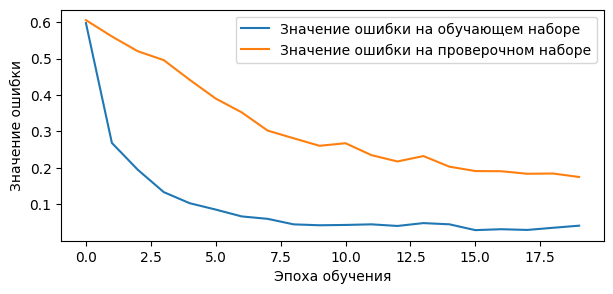

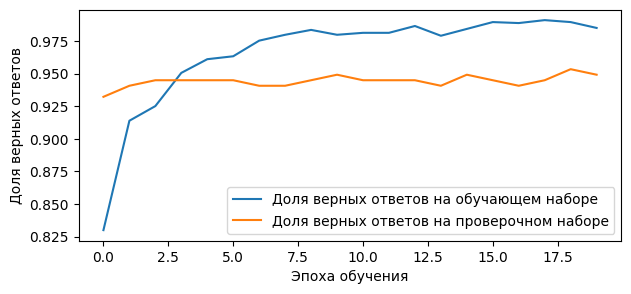

In [84]:
plt.figure(figsize = (7, 3))
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

# Строим график для отображения динамики обучения и точности предсказания сети
plt.figure(figsize = (7, 3))
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()